In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
plt.style.use('default')
sns.set_palette("husl")

In [6]:
fig = plt.figure(figsize=(20, 24))

<Figure size 2000x2400 with 0 Axes>

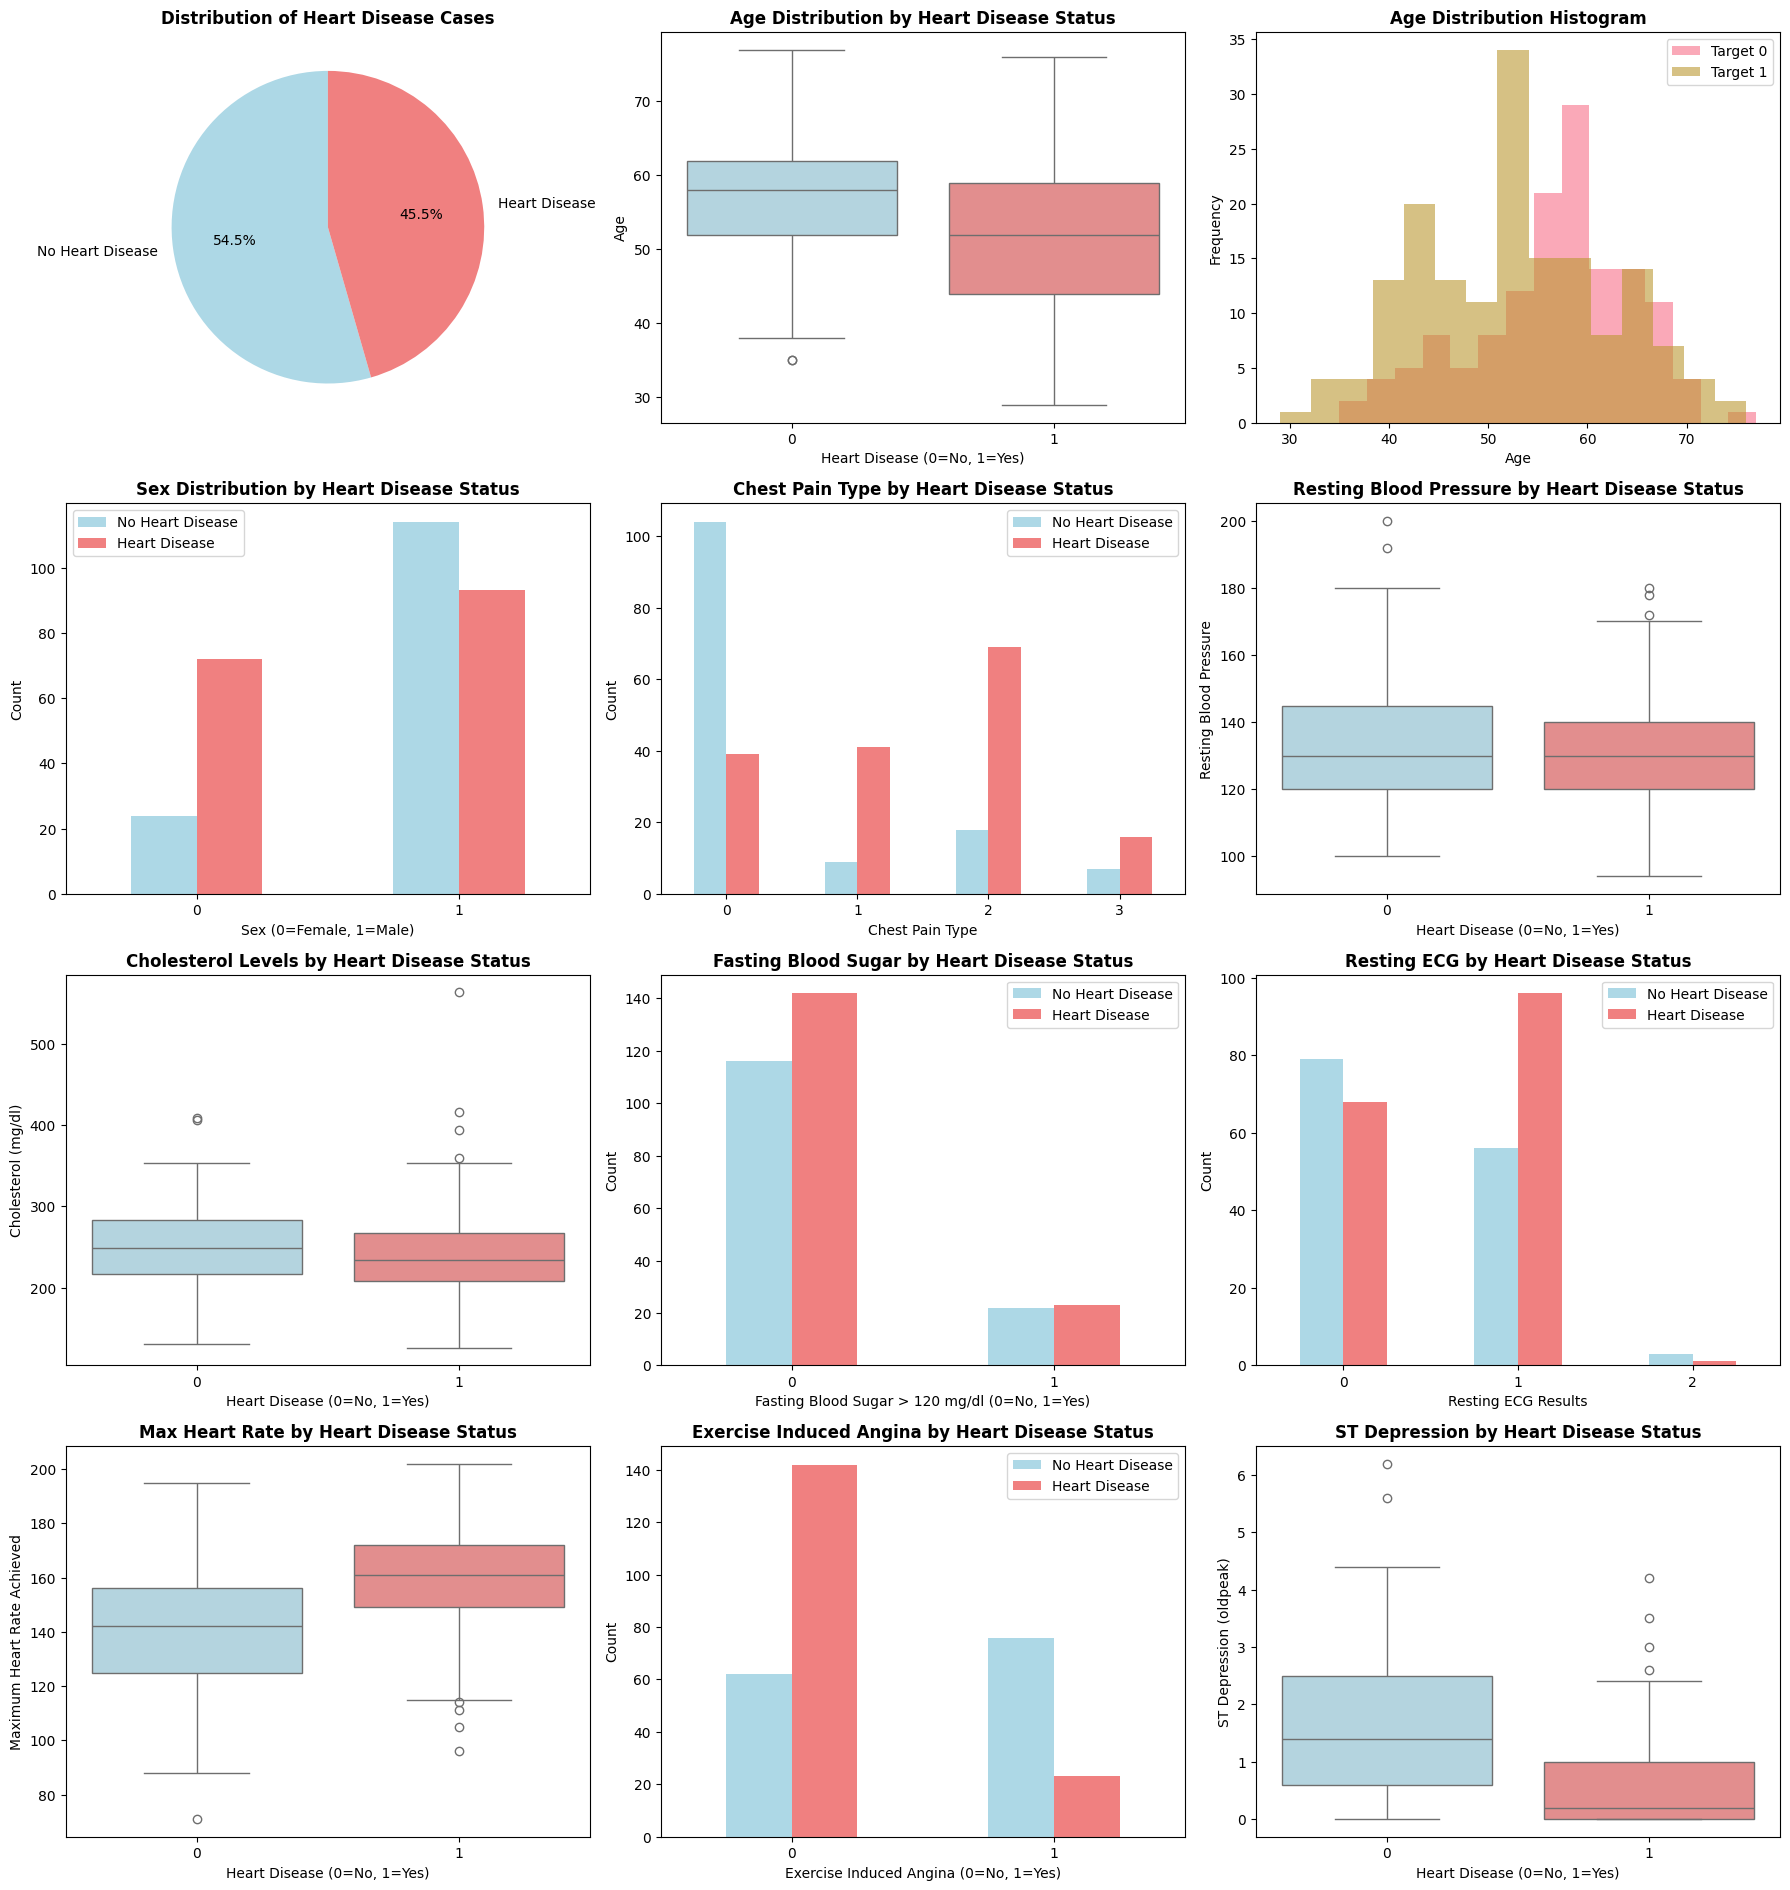

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(18, 28))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

target_counts = df['target'].value_counts()
axs[0, 0].pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
              autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axs[0, 0].set_title('Distribution of Heart Disease Cases', fontsize=12, fontweight='bold')

sns.boxplot(data=df, x='target', y='age', palette=['lightblue', 'lightcoral'], ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution by Heart Disease Status', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axs[0, 1].set_ylabel('Age')

for target in [0, 1]:
    subset = df[df['target'] == target]
    axs[0, 2].hist(subset['age'], alpha=0.6, label=f'Target {target}', bins=15)
axs[0, 2].set_title('Age Distribution Histogram', fontsize=12, fontweight='bold')
axs[0, 2].set_xlabel('Age')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].legend()

sex_target = pd.crosstab(df['sex'], df['target'])
sex_target.plot(kind='bar', color=['lightblue', 'lightcoral'], ax=axs[1, 0])
axs[1, 0].set_title('Sex Distribution by Heart Disease Status', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel('Sex (0=Female, 1=Male)')
axs[1, 0].set_ylabel('Count')
axs[1, 0].legend(['No Heart Disease', 'Heart Disease'])
axs[1, 0].tick_params(axis='x', rotation=0)

cp_target = pd.crosstab(df['cp'], df['target'])
cp_target.plot(kind='bar', color=['lightblue', 'lightcoral'], ax=axs[1, 1])
axs[1, 1].set_title('Chest Pain Type by Heart Disease Status', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel('Chest Pain Type')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend(['No Heart Disease', 'Heart Disease'])
axs[1, 1].tick_params(axis='x', rotation=0)

# 6. Resting Blood Pressure
sns.boxplot(data=df, x='target', y='trestbps', palette=['lightblue', 'lightcoral'], ax=axs[1, 2])
axs[1, 2].set_title('Resting Blood Pressure by Heart Disease Status', fontsize=12, fontweight='bold')
axs[1, 2].set_xlabel('Heart Disease (0=No, 1=Yes)')
axs[1, 2].set_ylabel('Resting Blood Pressure')

# 7. Cholesterol levels (excluding 0)
df_clean = df[df['chol'] > 0]
sns.boxplot(data=df_clean, x='target', y='chol', palette=['lightblue', 'lightcoral'], ax=axs[2, 0])
axs[2, 0].set_title('Cholesterol Levels by Heart Disease Status', fontsize=12, fontweight='bold')
axs[2, 0].set_xlabel('Heart Disease (0=No, 1=Yes)')
axs[2, 0].set_ylabel('Cholesterol (mg/dl)')

# 8. Fasting Blood Sugar
fbs_target = pd.crosstab(df['fbs'], df['target'])
fbs_target.plot(kind='bar', color=['lightblue', 'lightcoral'], ax=axs[2, 1])
axs[2, 1].set_title('Fasting Blood Sugar by Heart Disease Status', fontsize=12, fontweight='bold')
axs[2, 1].set_xlabel('Fasting Blood Sugar > 120 mg/dl (0=No, 1=Yes)')
axs[2, 1].set_ylabel('Count')
axs[2, 1].legend(['No Heart Disease', 'Heart Disease'])
axs[2, 1].tick_params(axis='x', rotation=0)

# 9. Resting ECG
restecg_target = pd.crosstab(df['restecg'], df['target'])
restecg_target.plot(kind='bar', color=['lightblue', 'lightcoral'], ax=axs[2, 2])
axs[2, 2].set_title('Resting ECG by Heart Disease Status', fontsize=12, fontweight='bold')
axs[2, 2].set_xlabel('Resting ECG Results')
axs[2, 2].set_ylabel('Count')
axs[2, 2].legend(['No Heart Disease', 'Heart Disease'])
axs[2, 2].tick_params(axis='x', rotation=0)

# 10. Max Heart Rate
sns.boxplot(data=df, x='target', y='thalach', palette=['lightblue', 'lightcoral'], ax=axs[3, 0])
axs[3, 0].set_title('Max Heart Rate by Heart Disease Status', fontsize=12, fontweight='bold')
axs[3, 0].set_xlabel('Heart Disease (0=No, 1=Yes)')
axs[3, 0].set_ylabel('Maximum Heart Rate Achieved')

# 11. Exercise Induced Angina
exang_target = pd.crosstab(df['exang'], df['target'])
exang_target.plot(kind='bar', color=['lightblue', 'lightcoral'], ax=axs[3, 1])
axs[3, 1].set_title('Exercise Induced Angina by Heart Disease Status', fontsize=12, fontweight='bold')
axs[3, 1].set_xlabel('Exercise Induced Angina (0=No, 1=Yes)')
axs[3, 1].set_ylabel('Count')
axs[3, 1].legend(['No Heart Disease', 'Heart Disease'])
axs[3, 1].tick_params(axis='x', rotation=0)

# 12. ST Depression (oldpeak)
sns.boxplot(data=df, x='target', y='oldpeak', palette=['lightblue', 'lightcoral'], ax=axs[3, 2])
axs[3, 2].set_title('ST Depression by Heart Disease Status', fontsize=12, fontweight='bold')
axs[3, 2].set_xlabel('Heart Disease (0=No, 1=Yes)')
axs[3, 2].set_ylabel('ST Depression (oldpeak)')

# Hide unused subplots (from axs[4, :] to axs[5, :])
for i in range(4, 6):
    for j in range(3):
        fig.delaxes(axs[i, j])

plt.tight_layout()
plt.show()

In [39]:
# Train Test Split
data = pd.read_csv('heart.csv')

X = data.iloc[:,:13].values
y = data["target"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
					units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14,
					kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
					kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
				metrics = ['accuracy'] )

In [42]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100 )

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5606 - loss: 0.6927   
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6083 - loss: 0.6880
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5778 - loss: 0.6725
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.6260
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.5707 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.5184 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.4474
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.4543 
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8284 - loss: 0.4259
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.4246 
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8515 - loss: 0.4105 
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - a

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[34, 10],
       [ 5, 42]])

In [45]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

83.51648351648352
